## Лабораторная работа №0
### Задание
#### Задать значения количества продаж по 10 товарам в течении 12 месяцев (помесячно).
#### Для каждого из товаров спрогнозировать количество продаж на следующий, 13 месяц и провести анализ достоверности планирования продаж.

In [256]:
# Импортируем модуль random для выполнения операций с генерацией случайных чисел и прочими случайными операциями.
import random

# Импортируем модуль numpy (сокращение от "Numerical Python") для эффективной работы с массивами и выполнения математических операций на них.
import numpy as np

# Импортируем модуль pandas для работы с данными в виде таблиц и датафреймов, предоставляя удобные инструменты для анализа и манипуляций данными.
import pandas as pd

# Импортируем модуль matplotlib.pyplot для создания графиков и визуализации данных, предоставляя множество функций для построения различных видов графиков.
import matplotlib.pyplot as plt

# Импортируем модуль warnings для управления предупреждениями во время выполнения программы.
# В этом фрагменте кода устанавливается игнорирование предупреждений типа FutureWarning, что может быть полезным для скрытия определенных сообщений о будущих изменениях в библиотеках.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [257]:
class Product:
    """
    Класс Product представляет товар с указанным именем и количеством (по умолчанию None).
    """
    def __init__(self, name, count=None):
        self.name = name
        if count is not None:
            self.count = count
        else:
            min_rand = random.randint(250, 500)
            delt_rand = 100
            self.count = np.random.normal(min_rand, delt_rand, 12)

    def __str__(self):
        """
        Возвращает строковое представление товара, включая его имя и количество за 12 месяцев.
        """
        return f'{self.name}: {[i for i in self.count]}'

    def __repr__(self):
        """
        Возвращает строковое представление товара, включая его имя и количество за 12 месяцев.
        """
        return f'{self.name}: {[i for i in self.count]}'

    def to_dict(self):
        """
        Преобразует товар в словарь, где ключ - имя товара, а значение - список количества за 12 месяцев.
        """
        return {
            self.name: self.count
        }

    def sum(self):
        """
        Возвращает общую стоимость товара за 12 месяцев.
        """
        return sum(self.count)

    def avg(self):
        """
        Возвращает среднюю цену товара за 12 месяцев.
        """
        return round(sum(self.count) / len(self.count), 4)

    def msd(self):
        """
        Возвращает среднеквадратичное отклонение (СКО) количества товара за 12 месяцев.
        """
        avg_value = self.avg()
        upper_value = sum([(v - avg_value) ** 2 for v in self.count])
        msd_square = upper_value / (len(self.count) - 1)
        return msd_square ** 0.5

In [258]:
# Создаем список товаров.
products = [
    Product(name='Футболки'),          
    Product(name='Джинсы'),   
    Product(name='Платья'), 
    Product(name='Пальто'),        
    Product(name='Шорты'),       
    Product(name='Юбки'),            
    Product(name='Рубашки'),                
    Product(name='Свитера'),        
    Product(name='Брюки'),  
    Product(name='Жакеты')                
]

products

[Футболки: [218.20751942259574, 381.3595905925274, 288.391443735082, 207.45809108197437, 179.49620858987842, 289.21609524709714, 317.3720854647225, 153.60708706670664, 204.62567782079068, 236.29198881200702, 573.173845392288, 373.46641984662693],
 Джинсы: [286.03650244029586, 296.5626753484227, 328.0122656157857, 308.93059754756837, 405.1653255755227, 469.2288126229745, 359.3580477389032, 349.3322039934327, 315.86226219394104, 160.38786226502836, 241.71059670738896, 414.1863718247499],
 Платья: [351.4135072343961, 418.51766062866307, 354.40126162409075, 376.76153534692793, 307.0772410058852, 249.5733922170448, 181.43853687128632, 443.249138312942, 425.79404806336765, 664.7785345405307, 391.7185084621822, 204.97229590599048],
 Пальто: [493.9148639107124, 665.1118538611803, 391.43505246271303, 462.17749292589264, 455.27993098287396, 600.0667129420999, 483.32423468005607, 406.0169479254326, 416.29293284881334, 500.6751162188409, 543.5429978085851, 420.1408139149382],
 Шорты: [436.11717366

In [259]:
def convert_list_products_to_dict(p_list: list):
    """
    Конвертирует лист продуктов в словарь для визуализации.
    """
    result = {}
    for p in p_list:
        result[p.name] = p.count
    return result

In [260]:
df = pd.DataFrame(convert_list_products_to_dict(products))
df

,Футболки,Джинсы,Платья,Пальто,Шорты,Юбки,Рубашки,Свитера,Брюки,Жакеты
0,218.207519,286.036502,351.413507,493.914864,436.117174,379.409569,327.473289,520.756560,298.652344,412.117137
1,381.359591,296.562675,418.517661,665.111854,249.603852,355.677421,414.551627,319.383600,585.024219,287.780556
2,288.391444,328.012266,354.401262,391.435052,272.562204,245.965541,462.935699,317.982089,444.948043,373.635787
3,207.458091,308.930598,376.761535,462.177493,264.950711,308.155543,228.316330,482.735372,497.806219,237.572249
4,179.496209,405.165326,307.077241,455.279931,379.922629,359.844306,217.883887,302.651472,624.165886,50.302182
5,289.216095,469.228813,249.573392,600.066713,409.067215,185.944002,348.057579,256.188451,562.313307,302.355852
6,317.372085,359.358048,181.438537,483.324235,401.512776,283.460679,292.990364,301.919648,612.893906,412.407745
7,153.607087,349.332204,443.249138,406.016948,140.909109,335.838976,283.458820,541.864870,395.558043,197.756050
8,204.625678,315.862262,425.794048,416.292933,660.800178,252.612056,426.694137,317.269710,617.403426,208.734621
9,236.291989,160.387862,664.778535,500.675116,551.651939,205.120554,432.163549,523.614439,427.917349,105.158374


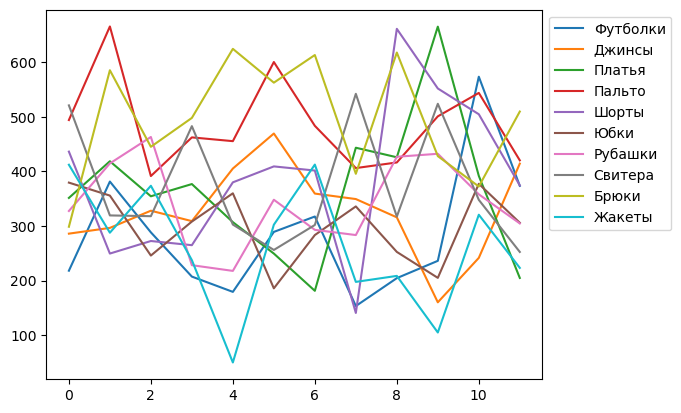

In [261]:
# Показываем количество товаров на графике, отображая данные для каждого товара.

for product in products:
    plt.plot([i for i in range(12)], product.count, label=product.name)

plt.legend(bbox_to_anchor=(1, 1))
plt.show()


In [262]:
# Вычисляем средние значения для каждого товара из списка и сохраняем их в список p0.
p0 = [product.avg() for product in products]

# Создаем список строк, в которых каждая строка содержит имя продукта и его среднее значение,
# используя списки p0 и products в соответствии с итерацией через zip().
[f'{p.name}: {p_avg}' for p_avg, p in zip(p0, products)]

['Футболки: 285.2222',
 'Джинсы: 327.8978',
 'Платья: 364.1413',
 'Пальто: 486.4982',
 'Шорты: 387.164',
 'Юбки: 299.5988',
 'Рубашки: 341.4383',
 'Свитера: 373.7299',
 'Брюки: 495.7002',
 'Жакеты: 260.9884']

In [263]:
# Вычисляем значения СКО (среднеквадратичного отклонения) для каждого товара в списке products.
msd_products = [product.msd() for product in products]

# Создаем список строк, в которых каждая строка содержит имя товара и его СКО значение,
# используя списки msd_products и products в соответствии с итерацией через zip().
[f'{product.name}: {msd_value}' for msd_value, product in zip(msd_products, products)]

['Футболки: 116.35912783900226',
 'Джинсы: 81.77925814528179',
 'Платья: 127.80399356348491',
 'Пальто: 82.42528994045246',
 'Шорты: 143.53851319573226',
 'Юбки: 65.91026937228732',
 'Рубашки: 80.47453596249127',
 'Свитера: 109.90163103452213',
 'Брюки: 108.25982050615683',
 'Жакеты: 113.54164690474099']

In [264]:
# Генерируем предсказанные значения, добавляя к средним значениям p0 случайный шум
# с нормальным распределением. Это позволяет смоделировать случайную изменчивость данных.
predict_values = p0 + np.random.normal(0, msd_products, len(msd_products))

predict_values

array([ 178.53415952,  212.64292195,  325.69114255,  430.5721348 ,
       -150.3220375 ,  352.3621428 ,  404.33794973,  383.3713    ,
        654.21427997,  323.92788732])

In [265]:
# Обновляем значения 'count' для продуктов в соответствии с предсказанными значениями 'predict_values'.
for product, predict_value in zip(products, predict_values):
    product.count = np.append(product.count, predict_value)
products

[Футболки: [218.20751942259574, 381.3595905925274, 288.391443735082, 207.45809108197437, 179.49620858987842, 289.21609524709714, 317.3720854647225, 153.60708706670664, 204.62567782079068, 236.29198881200702, 573.173845392288, 373.46641984662693, 178.53415952054235],
 Джинсы: [286.03650244029586, 296.5626753484227, 328.0122656157857, 308.93059754756837, 405.1653255755227, 469.2288126229745, 359.3580477389032, 349.3322039934327, 315.86226219394104, 160.38786226502836, 241.71059670738896, 414.1863718247499, 212.64292195439435],
 Платья: [351.4135072343961, 418.51766062866307, 354.40126162409075, 376.76153534692793, 307.0772410058852, 249.5733922170448, 181.43853687128632, 443.249138312942, 425.79404806336765, 664.7785345405307, 391.7185084621822, 204.97229590599048, 325.6911425546609],
 Пальто: [493.9148639107124, 665.1118538611803, 391.43505246271303, 462.17749292589264, 455.27993098287396, 600.0667129420999, 483.32423468005607, 406.0169479254326, 416.29293284881334, 500.6751162188409, 5

In [266]:
# Создаем DataFrame (таблицу) на основе словаря, полученного из списка продуктов 'products'
# с помощью функции 'convert_list_products_to_dict'.
df = pd.DataFrame(convert_list_products_to_dict(products))
df

,Футболки,Джинсы,Платья,Пальто,Шорты,Юбки,Рубашки,Свитера,Брюки,Жакеты
0,218.207519,286.036502,351.413507,493.914864,436.117174,379.409569,327.473289,520.756560,298.652344,412.117137
1,381.359591,296.562675,418.517661,665.111854,249.603852,355.677421,414.551627,319.383600,585.024219,287.780556
2,288.391444,328.012266,354.401262,391.435052,272.562204,245.965541,462.935699,317.982089,444.948043,373.635787
3,207.458091,308.930598,376.761535,462.177493,264.950711,308.155543,228.316330,482.735372,497.806219,237.572249
4,179.496209,405.165326,307.077241,455.279931,379.922629,359.844306,217.883887,302.651472,624.165886,50.302182
5,289.216095,469.228813,249.573392,600.066713,409.067215,185.944002,348.057579,256.188451,562.313307,302.355852
6,317.372085,359.358048,181.438537,483.324235,401.512776,283.460679,292.990364,301.919648,612.893906,412.407745
7,153.607087,349.332204,443.249138,406.016948,140.909109,335.838976,283.458820,541.864870,395.558043,197.756050
8,204.625678,315.862262,425.794048,416.292933,660.800178,252.612056,426.694137,317.269710,617.403426,208.734621
9,236.291989,160.387862,664.778535,500.675116,551.651939,205.120554,432.163549,523.614439,427.917349,105.158374


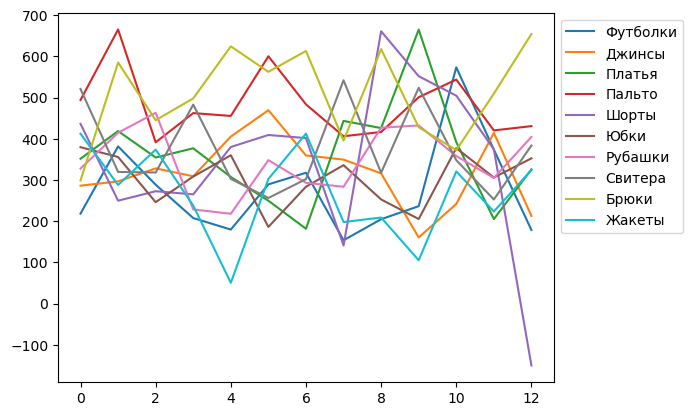

In [267]:
for product in products:
    plt.plot([i for i in range(13)], product.count, label=product.name)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [268]:
# Вычисляем уровень достоверности для каждого продукта, используя отношение СКО к среднему значению.
reliability = [msd_value / p0_value for msd_value, p0_value in zip(msd_products, p0)]

# Создаем список строк, в которых каждая строка содержит имя продукта и его уровень достоверности.
[f'{product.name}: {reliability_value}' for product, reliability_value in zip(products, reliability)]

['Футболки: 0.40795957621462237',
 'Джинсы: 0.24940471740061013',
 'Платья: 0.3509736290925663',
 'Пальто: 0.16942568326142307',
 'Шорты: 0.3707434399782321',
 'Юбки: 0.21999510469430225',
 'Рубашки: 0.23569276194993727',
 'Свитера: 0.29406700142140657',
 'Брюки: 0.21839777451402445',
 'Жакеты: 0.4350448023925239']

#### Первое условие
##### Величины $ {X_i} $ лежат близко к своему среднему значению. Это условие означает, что продажи стабильные
##### $ X_i - \hat{p_0} < 2\hat{\sigma} $ для всех $ i $

In [269]:
# Преобразуем списки p0 и msd_products в массивы NumPy для выполнения операций с массивами.
p0_np = np.array(p0)
msd_np = np.array(msd_products)

# Создаем DataFrame 'products_df' на основе словаря, полученного из списка продуктов 'products'.
products_df = pd.DataFrame(convert_list_products_to_dict(products))

# Вычисляем 'condition_one', сравнивая каждое значение в 'products_df' с условием.
# Условие считается истинным, если разница между значением 'products_df' и 'p0_np' меньше 2-х раз 'msd_np'.
condition_one = products_df - p0_np < (2 * msd_np)
condition_one

,Футболки,Джинсы,Платья,Пальто,Шорты,Юбки,Рубашки,Свитера,Брюки,Жакеты
0,True,True,True,True,True,True,True,True,True,True
1,True,True,True,False,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True,True,True,True
7,True,True,True,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True,True,True,True
9,True,True,False,True,True,True,True,True,True,True


In [270]:
# Вызываем метод '.all()' для DataFrame 'condition_one', чтобы проверить,
# выполняется ли условие ('True') для всех элементов в DataFrame.
condition_one.all()

Футболки    False
Джинсы       True
Платья      False
Пальто      False
Шорты        True
Юбки         True
Рубашки      True
Свитера      True
Брюки        True
Жакеты       True
dtype: bool

##### Второе условие
###### Экстраполируемые значения $ X_i $ с большей степенью достоверности не равны 0. Это условие означает, что период для прогноза не слишком велик
###### $ \hat{p_0} > 2\hat{\sigma} $

In [271]:
# Создаем новое условие 'condition_two', сравнивая каждое значение в 'p0_np' с условием.
# Условие считается истинным, если значение в 'p0_np' больше чем два раза 'msd_np'.
condition_two = p0_np > (2 * msd_np)
condition_two

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [272]:
[f'{product.name}: {condition_value}' for product, condition_value in zip(products, condition_two)]

['Футболки: True',
 'Джинсы: True',
 'Платья: True',
 'Пальто: True',
 'Шорты: True',
 'Юбки: True',
 'Рубашки: True',
 'Свитера: True',
 'Брюки: True',
 'Жакеты: True']

##### Третье условие
###### Среди $ X_i $ не встречаются нулевые значения. Это условие означает, что периодичность анализа данных выбрана правильно
###### $ X_i > 0 $ для всех $ i $

In [273]:
# Создаем список строк, в которых каждая строка содержит имя продукта и результат 'condition_three'.
condition_three = products_df > 0
condition_three

,Футболки,Джинсы,Платья,Пальто,Шорты,Юбки,Рубашки,Свитера,Брюки,Жакеты
0,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True,True,True,True
7,True,True,True,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True,True,True,True
9,True,True,True,True,True,True,True,True,True,True


In [274]:
# Вызываем метод '.all()' для DataFrame 'condition_three', чтобы проверить,
# выполняется ли условие ('True') для всех элементов в DataFrame.
condition_three.all()

Футболки     True
Джинсы       True
Платья       True
Пальто       True
Шорты       False
Юбки         True
Рубашки      True
Свитера      True
Брюки        True
Жакеты       True
dtype: bool

### Составим таблицу для визуализации достоверности планирования

In [275]:
def get_color_by_condition(c1, c2, c3):
    """
    Функция определяет уровень достоверности на основе трех условий.

    Возвращает:
    - str: Уровень достоверности, который может быть "Зеленый", "Желтый", "Оранжевый" или "Красный".
    """
    if c1 and c2 and c3:
        return "Зеленый"
    elif (not c1 and c2 and c3) or (c1 and not c2 and c3):
        return "Желтый"
    elif not c1 and not c2 and c3:
        return "Оранжевый"
    else:
        return "Красный"

In [276]:
# Создаем заголовок таблицы 'table_header' с названиями столбцов.
table_header = ["Товар", "Уровень достоверности", "Условие 1", "Условие 2", "Условие 3"]

# Создаем пустой список 'table_data' для хранения данных, которые будут добавлены в таблицу.
table_data = []

# Вычисляем результаты условий 'condition_one', 'condition_two' и 'condition_three'.
condition_one_result = condition_one.all()
condition_two_result = condition_two
condition_three_result = condition_three.all()

# В цикле добавляем данные о продуктах и их уровне достоверности в список 'table_data'.
for i in range(len(products)):
    table_data.append({
        "Товар": products[i].name,
        "Уровень достоверности": get_color_by_condition(condition_one_result[i], condition_two_result[i], condition_three_result[i]),
        "Условие 1": condition_one_result[i],
        "Условие 2": condition_two_result[i],
        "Условие 3": condition_three_result[i]
    })

# Создаем DataFrame 'table' на основе данных из 'table_data' и с заданным заголовком 'table_header'.
table = pd.DataFrame(table_data, columns=table_header)

# Выводим полученную таблицу 'table'.
table

,Товар,Уровень достоверности,Условие 1,Условие 2,Условие 3
0,Футболки,Желтый,False,True,True
1,Джинсы,Зеленый,True,True,True
2,Платья,Желтый,False,True,True
3,Пальто,Желтый,False,True,True
4,Шорты,Красный,True,True,False
5,Юбки,Зеленый,True,True,True
6,Рубашки,Зеленый,True,True,True
7,Свитера,Зеленый,True,True,True
8,Брюки,Зеленый,True,True,True
9,Жакеты,Зеленый,True,True,True


In [277]:
def color_rows_by_reliability(val):
    if val == "Зеленый":
        return 'background-color: green'
    elif val == "Желтый":
        return 'background-color: yellow'
    elif val == "Оранжевый":
        return 'background-color: orange'
    elif val == "Красный":
        return 'background-color: red'
    else:
        return ''

In [278]:
table_style = table["Уровень достоверности"].to_frame().applymap(lambda x: color_rows_by_reliability(x))
styled_table = table.style.apply(lambda x: table_style, axis=None)
styled_table

,Товар,Уровень достоверности,Условие 1,Условие 2,Условие 3
0,Футболки,Желтый,False,True,True
1,Джинсы,Зеленый,True,True,True
2,Платья,Желтый,False,True,True
3,Пальто,Желтый,False,True,True
4,Шорты,Красный,True,True,False
5,Юбки,Зеленый,True,True,True
6,Рубашки,Зеленый,True,True,True
7,Свитера,Зеленый,True,True,True
8,Брюки,Зеленый,True,True,True
9,Жакеты,Зеленый,True,True,True
